# **DATA SET IMPORTING:-**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Covid_19_Clean_Complete (2).csv to Covid_19_Clean_Complete (2).csv


# **Required File Importing:-**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **READING THE DATASET:-**

In [3]:
df=pd.read_csv('Covid_19_Clean_Complete (2).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [6]:
df.rename(columns={
    'Province/State':'state',
    'Country/Region':'country'   # changing the names of columns with rename.
},inplace=True)


In [7]:
df.columns

Index(['state', 'country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [9]:
df_new=df.groupby(['country'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [10]:
df_new  # printing the total number of attributes according to regions

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


## **ANALYSIS ON CONFIRMED CASES:-**

In [11]:
df_final1=df.groupby(['Date'])['Confirmed'].sum().reset_index()  # TOTAL NUMBER OF ACTIVE CASES ACCORDING TO EACH DATE.

In [12]:
df_final1

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


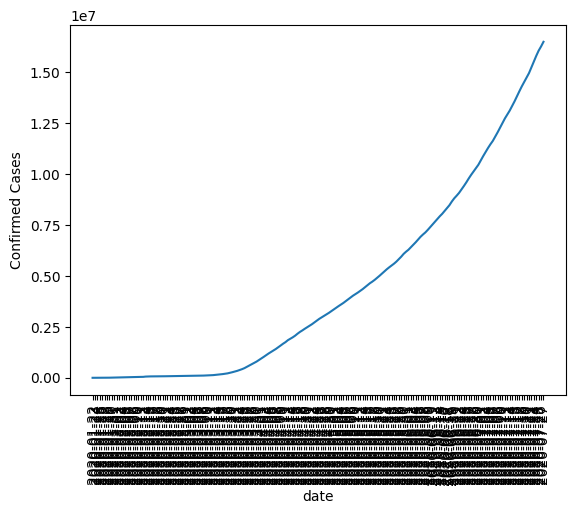

In [13]:
sns.lineplot(x='Date',y='Confirmed',data=df_final1)
plt.xlabel('date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Prophet

'''
Prophet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range
of time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes
important dates or events that can impact the forecast.
'''
!pip install Prophet

##**WORKING WITH PROPHET:-**

In [15]:
from prophet import Prophet

In [21]:
model=Prophet()

In [20]:
df_final1.columns=['ds','y']

In [22]:
model.fit(df_final1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwb0o3m0d/4q3vzukk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwb0o3m0d/26469s42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8233', 'data', 'file=/tmp/tmpwb0o3m0d/4q3vzukk.json', 'init=/tmp/tmpwb0o3m0d/26469s42.json', 'output', 'file=/tmp/tmpwb0o3m0d/prophet_modelk2zx30ns/prophet_model-20250516161521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future=model.make_future_dataframe(periods=7)
forecast=model.predict(future)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-2779.909879,1125.768413,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-2182.887585,1933.840976,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-1330.113502,2512.064279,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-1532.245265,2355.901993,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-2239.709776,1691.988444,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.723561,661462.785240,665507.911977,662896.722246,663427.189861,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,663491.395651
191,2020-07-31,668132.130984,666732.539247,671267.818002,667680.609238,668760.654053,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,669006.394312
192,2020-08-01,673161.538407,671504.811931,676268.259828,672351.216911,674308.499365,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,673888.426957
193,2020-08-02,678190.945830,675358.098565,680632.854899,677027.024596,679878.167514,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,678025.345020


In [45]:
forecast[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-2779.909879,-713.300051,1125.768413
1,-2182.887585,-43.747057,1933.840976
2,-1330.113502,531.538048,2512.064279
3,-1532.245265,473.857138,2355.901993
4,-2239.709776,-328.938355,1691.988444
...,...,...,...
190,661462.785240,663491.395651,665507.911977
191,666732.539247,669006.394312,671267.818002
192,671504.811931,673888.426957,676268.259828
193,675358.098565,678025.345020,680632.854899


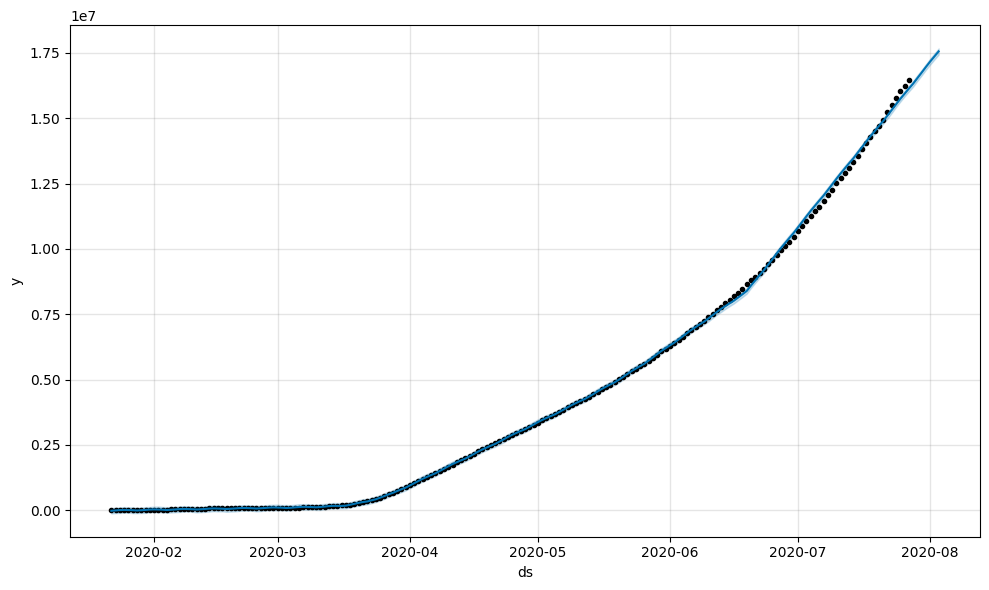

In [26]:
model.plot(forecast)
plt.show()

# MODEL PREDICTS VERY WELL

In [27]:
import plotly.express as ex

In [28]:
world=df.groupby(['country'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [31]:
figure=ex.choropleth(world,locations='country',locationmode='country names',color='Active',hover_name='country',range_color=[1,100000],color_continuous_scale='reds',title='World map showing all the actives cases ')
figure.show()

## **ANALYSIS ON DEATH CASES:-**

In [32]:
df_final2=df.groupby(['Date'])['Deaths'].sum().reset_index()

In [33]:
df_final2

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


<Axes: >

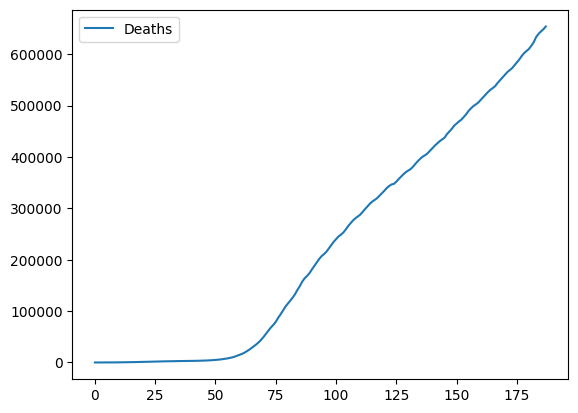

In [36]:
df_final2.plot()

In [37]:
df_final2.columns=['ds','y']

In [39]:
model2=Prophet()

In [40]:
model2.fit(df_final2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwb0o3m0d/i6a4h5xw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwb0o3m0d/1v11h39h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40535', 'data', 'file=/tmp/tmpwb0o3m0d/i6a4h5xw.json', 'init=/tmp/tmpwb0o3m0d/1v11h39h.json', 'output', 'file=/tmp/tmpwb0o3m0d/prophet_modelqyhxjdbe/prophet_model-20250516163724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
future=model2.make_future_dataframe(periods=7)
forecast2=model2.predict(future)

In [51]:
forecast2[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-2758.098698,-713.300051,1440.130793
1,-1963.911102,-43.747057,1886.301978
2,-1573.650754,531.538048,2559.439782
3,-1521.884441,473.857138,2449.590849
4,-2287.494485,-328.938355,1522.200160
...,...,...,...
190,661676.434101,663491.395651,665572.872817
191,666639.478444,669006.394312,671276.034564
192,671444.243380,673888.426957,676153.799141
193,675513.796982,678025.345020,680508.555178


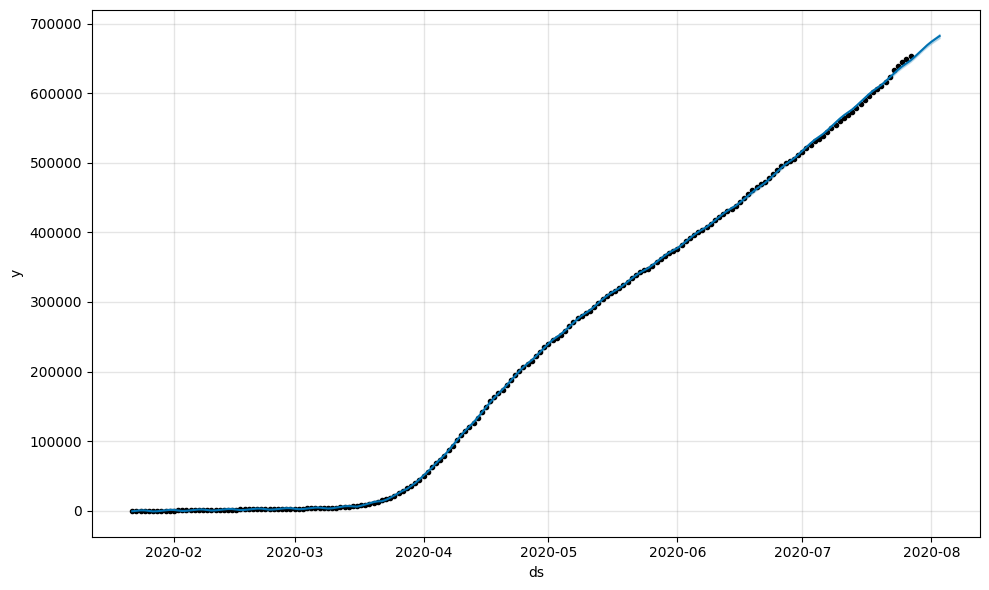

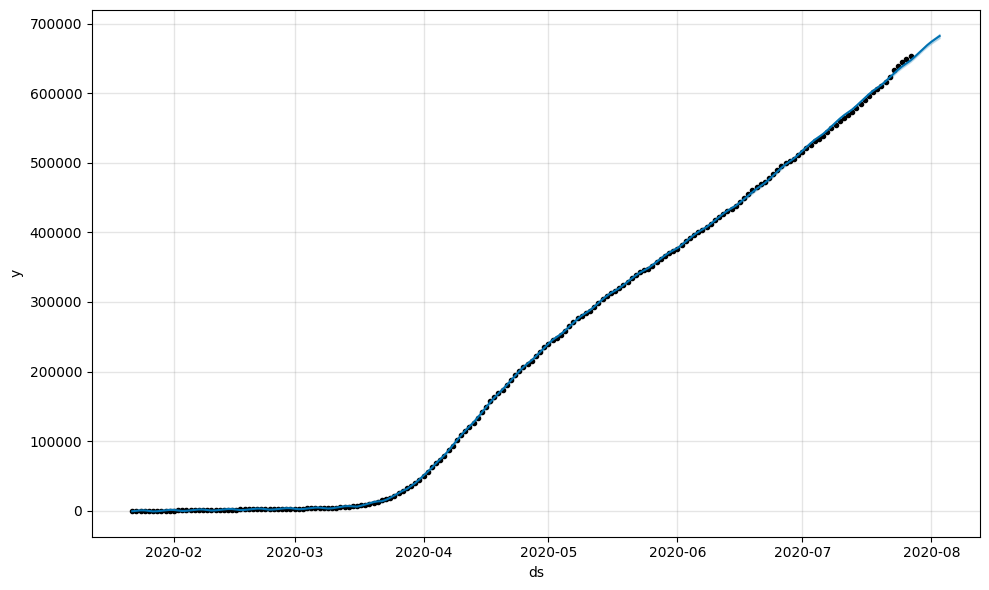

In [52]:
model2.plot(forecast2)

In [54]:
world=df.groupby(['country'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [55]:
world

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [56]:
figure=ex.choropleth(world,locations='country',locationmode='country names',color='Deaths',hover_name='country',range_color=[1,100000],color_continuous_scale='reds',title='World map showing all the actives cases ')
figure.show()

# **ANALYSIS ON RECOVERED CASES:-**

In [60]:
df_final3=df.groupby(['Date'])['Recovered'].sum().reset_index()

In [61]:
df_final3

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


<Axes: >

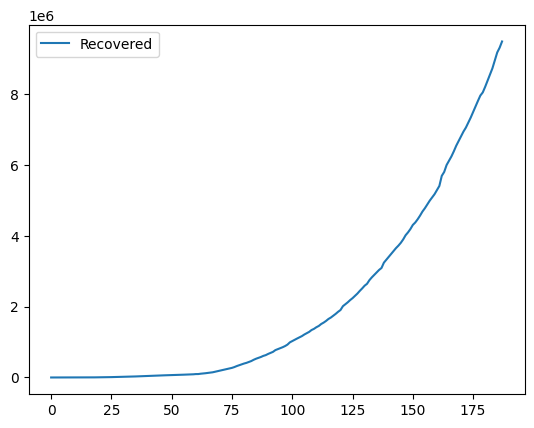

In [62]:
df_final3.plot()

In [63]:
model3=Prophet()

In [65]:
df_final3.columns=['ds','y']

In [67]:
model3.fit(df_final3)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwb0o3m0d/_fr2jtq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwb0o3m0d/tb0tpig7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78472', 'data', 'file=/tmp/tmpwb0o3m0d/_fr2jtq9.json', 'init=/tmp/tmpwb0o3m0d/tb0tpig7.json', 'output', 'file=/tmp/tmpwb0o3m0d/prophet_modeljxvk361f/prophet_model-20250516165424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [69]:
future=model3.make_future_dataframe(periods=7)
forecast3=model3.predict(future)

In [70]:
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.360148e+04,-9.580628e+04,5.899414e+04,-1.360148e+04,-1.360148e+04,-4840.630407,-4840.630407,-4840.630407,-4840.630407,-4840.630407,-4840.630407,0.0,0.0,0.0,-1.844211e+04
1,2020-01-23,-1.243665e+04,-9.070307e+04,6.957054e+04,-1.243665e+04,-1.243665e+04,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,0.0,0.0,0.0,-1.118185e+04
2,2020-01-24,-1.127183e+04,-8.419896e+04,8.000811e+04,-1.127183e+04,-1.127183e+04,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,0.0,0.0,0.0,-5.175679e+03
3,2020-01-25,-1.010701e+04,-7.637892e+04,7.784029e+04,-1.010701e+04,-1.010701e+04,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,0.0,0.0,0.0,-4.075673e+02
4,2020-01-26,-8.942184e+03,-9.260722e+04,6.837533e+04,-8.942184e+03,-8.942184e+03,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,0.0,0.0,0.0,-9.825667e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,9.594528e+06,9.518118e+06,9.679242e+06,9.590286e+06,9.599249e+06,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,1254.800836,0.0,0.0,0.0,9.595783e+06
191,2020-07-31,9.731086e+06,9.660359e+06,9.824929e+06,9.722999e+06,9.740264e+06,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,6096.150842,0.0,0.0,0.0,9.737182e+06
192,2020-08-01,9.867644e+06,9.797559e+06,9.959620e+06,9.854088e+06,9.885412e+06,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,9699.439346,0.0,0.0,0.0,9.877343e+06
193,2020-08-02,1.000420e+07,9.922853e+06,1.008325e+07,9.985658e+06,1.002848e+07,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,-883.483111,0.0,0.0,0.0,1.000332e+07


In [71]:
forecast3[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-9.580628e+04,-1.844211e+04,5.899414e+04
1,-9.070307e+04,-1.118185e+04,6.957054e+04
2,-8.419896e+04,-5.175679e+03,8.000811e+04
3,-7.637892e+04,-4.075673e+02,7.784029e+04
4,-9.260722e+04,-9.825667e+03,6.837533e+04
...,...,...,...
190,9.518118e+06,9.595783e+06,9.679242e+06
191,9.660359e+06,9.737182e+06,9.824929e+06
192,9.797559e+06,9.877343e+06,9.959620e+06
193,9.922853e+06,1.000332e+07,1.008325e+07


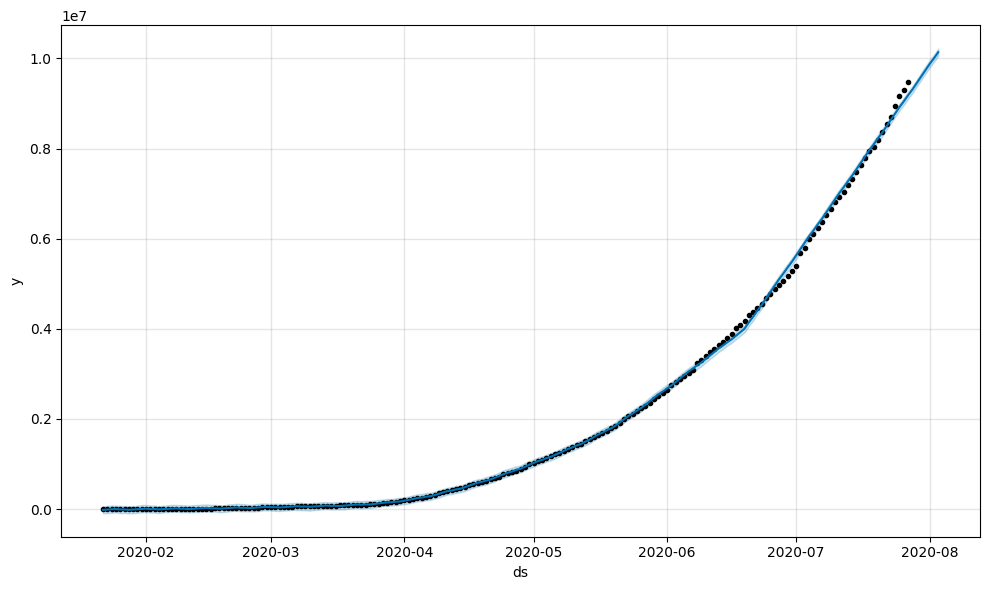

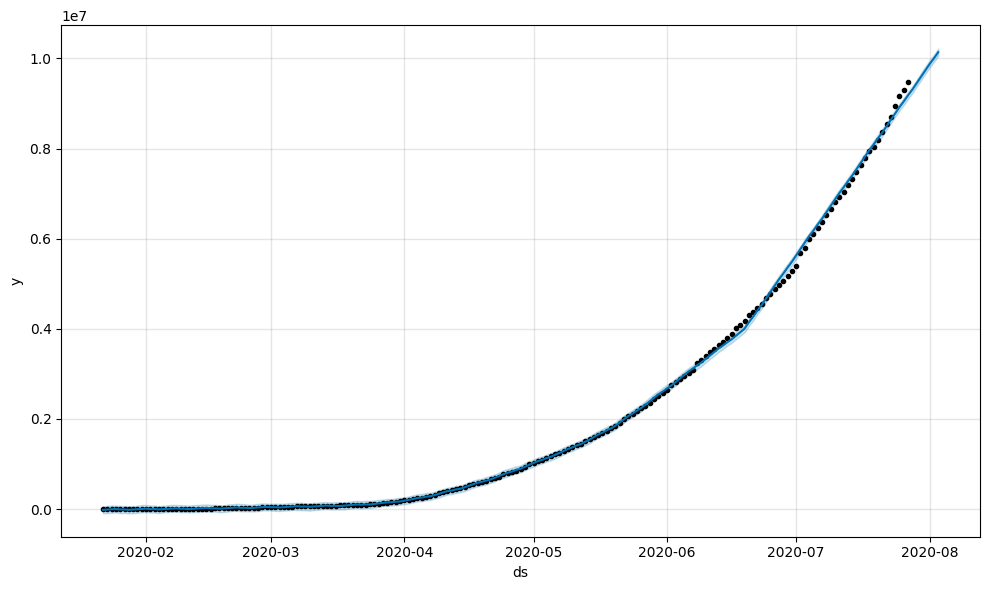

In [72]:
model3.plot(forecast3)

In [73]:
figure=ex.choropleth(world,locations='country',locationmode='country names',color='Recovered',hover_name='country',range_color=[1,100000],color_continuous_scale='reds',title='World map showing all the actives cases ')
figure.show()